In [76]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dfb = pd.read_csv('datasets/fact_bookings.csv')

In [4]:
dfb.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
dfb.shape

(134590, 12)

In [6]:
dfb.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [8]:
dfb['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [9]:
dfb['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [10]:
dfb['room_category'].value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

<Axes: >

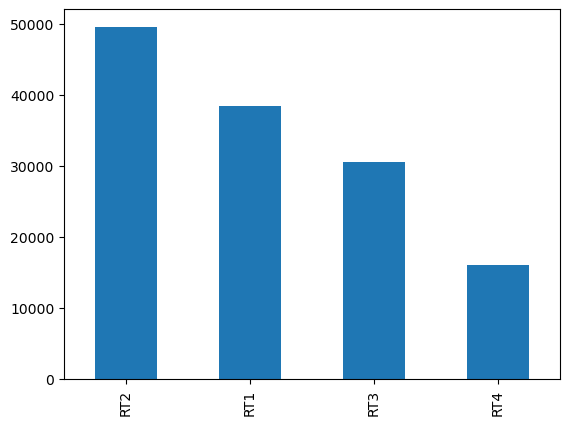

In [13]:
dfb['room_category'].value_counts().plot(kind='bar')

<Axes: >

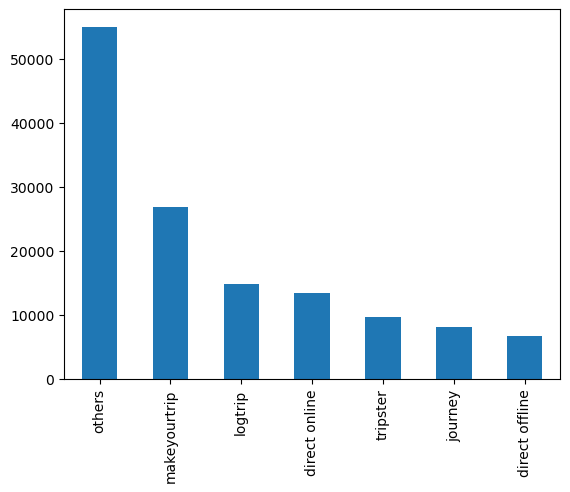

In [16]:
dfb['booking_platform'].value_counts().plot(kind='bar')

In [17]:
dfb.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


-17 is not no_guest need to clean data

In [18]:
dfb['revenue_generated'].min() , dfb['revenue_generated'].max()

(6500, 28560000)

In [19]:
df_d = pd.read_csv('datasets/dim_date.csv')
df_h = pd.read_csv('datasets/dim_hotels.csv')
df_r = pd.read_csv('datasets/dim_rooms.csv')
df_ab = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [20]:
df_h.shape

(25, 4)

In [22]:
df_h.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [23]:
df_h['category'].value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [24]:
df_h['city'].value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<Axes: >

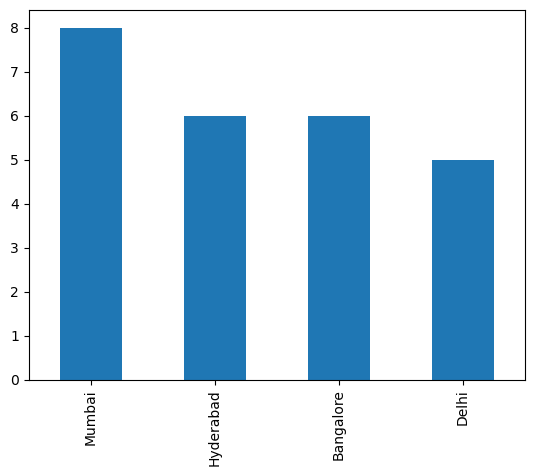

In [26]:
df_h['city'].value_counts().plot(kind='bar')

# Data Cleaning

In [27]:
dfb.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [28]:
dfb[dfb['no_guests']<=0]   

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


providing the -ve values in the number of guest columns which is wrong

In [30]:
dfb.shape    # high records and can be ignore this 

(134590, 12)

In [31]:
df_b = dfb[dfb['no_guests']>=0]     # skip that data which is -ve

In [32]:
df_b

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [33]:
df_b.shape

(134578, 12)

In [42]:
min, max = df_b['revenue_generated'].min() , df_b['revenue_generated'].max()

In [43]:
avg, std = df_b['revenue_generated'].mean() , df_b['revenue_generated'].std()

In [46]:
lower_limit = avg - 3*std
higher_limit = avg + 3*std

In [47]:
lower_limit,higher_limit,avg, std, min, max

(-263742.4278566132,
 294498.50173198653,
 15378.036937686695,
 93040.15493143328,
 6500,
 28560000)

In [48]:
df_b[df_b.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [49]:
df_b = df_b[df_b.revenue_generated<higher_limit]      # skips the above data with reverse the condition

In [51]:
df_b.shape

(134573, 12)

In [52]:
df_b['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [57]:
df_b.isnull().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [58]:
df_b['ratings_given'].fillna(df_b['ratings_given'].mean(), inplace=True)

C:\Users\shela\AppData\Local\Temp\ipykernel_15788\479791680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['ratings_given'].fillna(df_b['ratings_given'].mean(), inplace=True)


Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [64]:
df_ab['Exceed_Capacity'] = df_ab['successful_bookings'] - df_ab['capacity']
df_ab[df_ab['Exceed_Capacity']>0]

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity
3,17558,1-May-22,RT1,30,19.0,11.0
12,16563,1-May-22,RT1,100,41.0,59.0
4136,19558,11-Jun-22,RT2,50,39.0,11.0
6209,19560,2-Jul-22,RT1,123,26.0,97.0
8522,19559,25-Jul-22,RT1,35,24.0,11.0
9194,18563,31-Jul-22,RT4,20,18.0,2.0


There are 6 record of the system where capacity of hotel axceed

In [68]:
df_ab.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,-5.0,83.33
1,19562,1-May-22,RT1,28,30.0,-2.0,93.33
2,19563,1-May-22,RT1,23,30.0,-7.0,76.67
3,17558,1-May-22,RT1,30,19.0,11.0,157.89
4,16558,1-May-22,RT1,18,19.0,-1.0,94.74


In [65]:
df_ab['occ_pct'] = df_ab['successful_bookings']/df_ab['capacity']

In [67]:
df_ab['occ_pct'] = df_ab['occ_pct'].apply(lambda x: round(x*100,2))

# Insights Generation from the data

what is the occupancy rate in each room categoryes

In [69]:
df_ab.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [70]:
df_r

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [72]:
# joining the dataset

df = pd.merge(df_ab, df_r, left_on='room_category', right_on = 'room_id')

In [75]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [77]:
df.drop('room_id', axis=1, inplace=True)

In [78]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,-5.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,-2.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,-7.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,11.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,-1.0,94.74,Standard


In [80]:
df_h.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [82]:
df= pd.merge(df, df_h, on = 'property_id', how='left')

In [85]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,-5.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,-10.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,-13.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,-9.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,-14.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


<Axes: xlabel='city_x'>

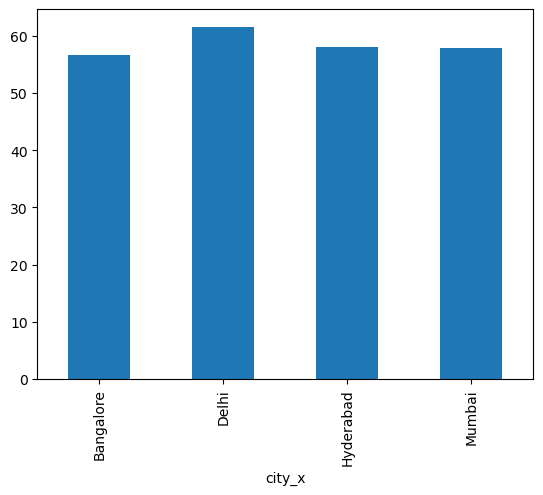

In [88]:
df.groupby('city_x')['occ_pct'].mean().plot(kind='bar')

whwn the occupancy is better ? weekday or weekend?

In [91]:
df_d.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [92]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,-5.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,-10.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


In [96]:
df = pd.merge(df, df_d, left_on = 'check_in_date', right_on='date')

In [99]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,-12.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,-16.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,-12.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,-5.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,-12.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [108]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

<Axes: xlabel='day_type'>

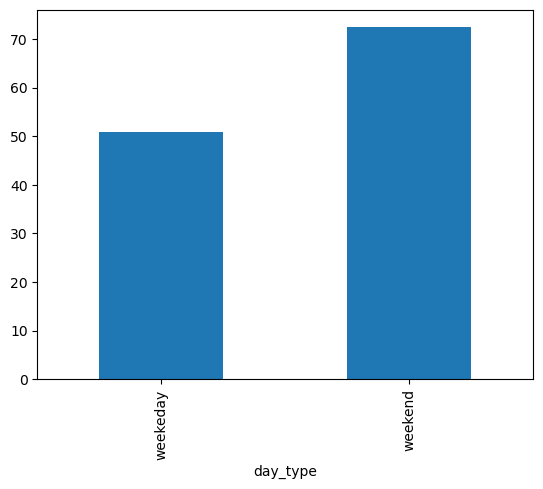

In [110]:
df.groupby('day_type')['occ_pct'].mean().round(2).plot(kind='bar')

In [114]:
df_june = df[df['mmm yy']=='Jul 22']

In [117]:
df_june.groupby('city_y')['occ_pct'].mean().round(2)

city_y
Bangalore    54.07
Delhi        59.18
Hyderabad    55.36
Mumbai       55.24
Name: occ_pct, dtype: float64

In [118]:
# join new dataset 

In [119]:
df_new = pd.read_csv('datasets/new_data_august.csv')

In [120]:
df_new.shape

(7, 13)

In [124]:
df_updated = pd.concat([df, df_new], ignore_index= True, axis=0)
df_updated.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,Exceed_Capacity,occ_pct,room_class,property_name_x,category_x,...,category_y,city_y,date,mmm yy,week no,day_type,property_name,category,city,occ%
0,16559,10-May-22,RT1,18,30.0,-12.0,60.00,Standard,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,NaN,NaN,NaN,NaN
1,16559,10-May-22,RT2,25,41.0,-16.0,60.98,Elite,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,NaN,NaN,NaN,NaN


In [127]:
df_b.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,3.619045,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.000000,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.000000,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,3.619045,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,3.619045,No Show,9100,9100


In [129]:
df_b.groupby('booking_platform')['revenue_realized'].mean()

booking_platform
direct offline    12790.601659
direct online     12632.618289
journey           12648.819887
logtrip           12708.874670
makeyourtrip      12671.553540
others            12700.582300
tripster          12779.522430
Name: revenue_realized, dtype: float64

In [133]:
df_b = pd.merge(df_b, df_h,on='property_id', how='left')

<Axes: xlabel='city'>

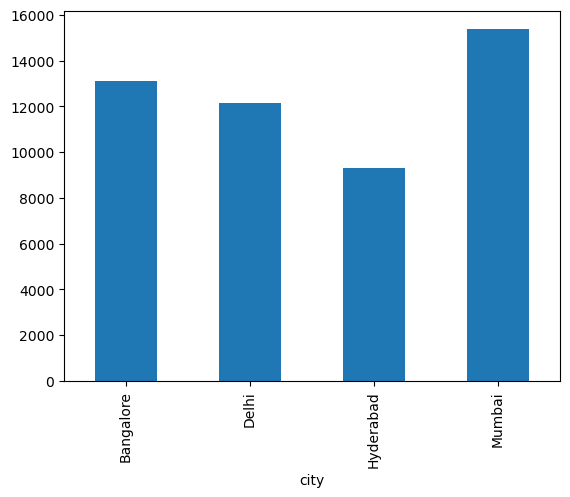

In [135]:
df_b.groupby('city')['revenue_realized'].mean().plot(kind='bar')